In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
ndim=28

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train_fs, y_train_fs), (X_test_fs, y_test_fs) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

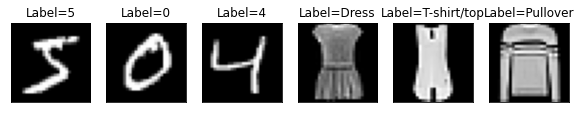

In [4]:
fig, axarr = plt.subplots(1,6, figsize=(10,8))
for i in range(len(axarr)-3):
    axarr[i].imshow(x_train[i].reshape(ndim,ndim), cmap='gist_gray')
    axarr[i].set_title(f"Label={y_train[i].argmax()}")
    axarr[i].yaxis.set_visible(False)
    axarr[i].xaxis.set_visible(False)
    
for i in range(len(axarr)-3, len(axarr)):
    axarr[i].imshow(X_train_fs[i].reshape(ndim,ndim), cmap='gist_gray')
    axarr[i].set_title(f"Label={class_names[y_train_fs[i]]}")
    axarr[i].yaxis.set_visible(False)
    axarr[i].xaxis.set_visible(False)


In [5]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [6]:
from sklearn.neighbors import KNeighborsClassifier
def run_classifier(x_train_classifer, y_train_classifer, x_test_classifer, y_test_classifer):
        clf = KNeighborsClassifier(10)
        clf.fit(x_train_classifer.reshape((len(x_train_classifer), ndim*ndim)), y_train_classifer)

        y_pred = clf.predict(x_train_classifer.reshape((len(x_train_classifer), ndim*ndim)))
        clf_train_f1 = f1_score(y_train_classifer, y_pred, average='macro')
        y_pred = clf.predict(x_test_classifer.reshape((len(x_test_classifer), ndim*ndim)))
        clf_test_f1 = f1_score(y_test_classifer, y_pred, average='macro')

        print(f"Train F1-score= {(clf_train_f1):.3e}")
        print(f"Test F1-score= {(clf_test_f1):.3e}")
        
        return clf_train_f1, clf_test_f1

In [7]:
step=1
mean=0
std=0.05
noise_factor=1.0

In [8]:
autoencoder=keras.models.load_model('mnist_50epoch_128batch_50000train_autoencoder.h5')
encoder=keras.models.load_model('mnist_50epoch_128batch_50000train_encoder.h5')
decoder=keras.models.load_model('mnist_50epoch_128batch_50000train_decoder.h5')

In [12]:
img_per_class=10

labeled_train_data_counter=np.zeros(10)
labeled_train_data_indices=np.ones((10,img_per_class))*-1
for i, y in enumerate(y_train[50000:]):
    if labeled_train_data_counter.sum() == img_per_class*10:
        break
    y_arg = y.argmax()
    counter= int(labeled_train_data_counter[y_arg])
    if counter >= img_per_class:
        continue
    if labeled_train_data_indices[y_arg, counter] == -1:
        labeled_train_data_counter[y_arg] +=1
        labeled_train_data_indices[y_arg, counter] = i
        
labeled_train_data_indices=labeled_train_data_indices.astype(int)+50000

indices=labeled_train_data_indices.flatten('F')
x_train_classifer=x_train[indices].copy()
y_train_classifer=y_train[indices].copy().argmax(axis=1)

x_test_classifer=x_test.copy()
y_test_classifer=y_test.copy().argmax(axis=1)

print(x_train_classifer.shape)

hist_clf_train_f1, hist_clf_test_f1=[], []

clf_train_f1, clf_test_f1=run_classifier(x_train_classifer, y_train_classifer,
                                         x_test_classifer, y_test_classifer)
hist_clf_train_f1.append(clf_train_f1)
hist_clf_test_f1.append(clf_test_f1)

(100, 28, 28, 1)
Train F1-score= 7.063e-01
Test F1-score= 6.122e-01


In [13]:
labeled_train_data_indices

array([[50018, 50024, 50026, 50036, 50042, 50057, 50061, 50070, 50072,
        50081],
       [50016, 50023, 50032, 50051, 50055, 50056, 50062, 50063, 50068,
        50083],
       [50011, 50028, 50052, 50065, 50085, 50096, 50105, 50153, 50167,
        50196],
       [50000, 50007, 50012, 50025, 50033, 50043, 50045, 50067, 50087,
        50107],
       [50005, 50009, 50014, 50022, 50031, 50049, 50050, 50069, 50080,
        50089],
       [50006, 50010, 50017, 50019, 50060, 50071, 50091, 50111, 50138,
        50142],
       [50002, 50004, 50027, 50034, 50039, 50058, 50059, 50073, 50076,
        50082],
       [50021, 50037, 50038, 50046, 50047, 50064, 50066, 50075, 50095,
        50100],
       [50001, 50008, 50013, 50015, 50035, 50040, 50044, 50048, 50054,
        50074],
       [50003, 50020, 50029, 50030, 50041, 50053, 50078, 50079, 50084,
        50088]])

In [14]:
def plot_orig_recon_imgs(labeled_img, noised_img, iteration, y_true):
    fig, axarr = plt.subplots(1,2)
    axarr[0].imshow(labeled_img, cmap='gist_gray')
    axarr[0].set_title("Original Image")
    axarr[0].yaxis.set_visible(False)
    axarr[0].xaxis.set_visible(False)
    axarr[1].imshow(noised_img[0], cmap='gist_gray')
    axarr[1].set_title("Reconstructed Image")
    axarr[1].yaxis.set_visible(False)
    axarr[1].xaxis.set_visible(False)
    fig.suptitle(f"Iteration {iteration}, Image Label: {y_true}")
    fig.savefig(f"plots/iteration{iteration}")
    # plt.show()
    plt.close()

In [15]:
idx=0
iteration=0

In [16]:
# x_unseen=x_train[50000:].copy()
# y_unseen=y_train[50000:].copy().argmax(axis=1)
rejected_counter=0
accepted_counter=0

while iteration < 10000:

    iteration+=1
    print(f"Iteration {iteration}:")
    
    train_size=x_train_classifer.shape[0]
    print("Train dataset size=", train_size)
    
    # random_idx=np.random.choice(10*img_per_class, 1)[0]
    idx=idx%(10*img_per_class)
    random_idx=idx
    print(random_idx)
    labeled_img = x_train_classifer[random_idx]
    encoded_data = encoder.predict(np.array([labeled_img]), verbose=0)
    noise_data = noise_factor * np.random.normal(mean, std, size=encoded_data.shape)
    perturbed_data = noise_data+encoded_data
    noised_img = decoder.predict(perturbed_data, verbose=0)
        
    plot_orig_recon_imgs(labeled_img, noised_img, iteration, y_train_classifer[random_idx])
    
    x_train_classifer = np.concatenate([x_train_classifer, noised_img], axis=0)
    y_train_classifer = np.concatenate([y_train_classifer, [y_train_classifer[random_idx]]])
    
    if iteration % 1000==0:
        clf_train_f1, clf_test_f1=run_classifier(x_train_classifer, y_train_classifer,
                                                 x_test_classifer, y_test_classifer)
        hist_clf_train_f1.append(clf_train_f1)
        hist_clf_test_f1.append(clf_test_f1)

    idx+=1

Iteration 1:
Train dataset size= 100
0
Iteration 2:
Train dataset size= 101
1
Iteration 3:
Train dataset size= 102
2
Iteration 4:
Train dataset size= 103
3
Iteration 5:
Train dataset size= 104
4
Iteration 6:
Train dataset size= 105
5
Iteration 7:
Train dataset size= 106
6
Iteration 8:
Train dataset size= 107
7
Iteration 9:
Train dataset size= 108
8
Iteration 10:
Train dataset size= 109
9
Iteration 11:
Train dataset size= 110
10
Iteration 12:
Train dataset size= 111
11
Iteration 13:
Train dataset size= 112
12
Iteration 14:
Train dataset size= 113
13
Iteration 15:
Train dataset size= 114
14
Iteration 16:
Train dataset size= 115
15
Iteration 17:
Train dataset size= 116
16
Iteration 18:
Train dataset size= 117
17
Iteration 19:
Train dataset size= 118
18
Iteration 20:
Train dataset size= 119
19
Iteration 21:
Train dataset size= 120
20
Iteration 22:
Train dataset size= 121
21
Iteration 23:
Train dataset size= 122
22
Iteration 24:
Train dataset size= 123
23
Iteration 25:
Train dataset size= 1

Iteration 200:
Train dataset size= 299
99
Iteration 201:
Train dataset size= 300
0
Iteration 202:
Train dataset size= 301
1
Iteration 203:
Train dataset size= 302
2
Iteration 204:
Train dataset size= 303
3
Iteration 205:
Train dataset size= 304
4
Iteration 206:
Train dataset size= 305
5
Iteration 207:
Train dataset size= 306
6
Iteration 208:
Train dataset size= 307
7
Iteration 209:
Train dataset size= 308
8
Iteration 210:
Train dataset size= 309
9
Iteration 211:
Train dataset size= 310
10
Iteration 212:
Train dataset size= 311
11
Iteration 213:
Train dataset size= 312
12
Iteration 214:
Train dataset size= 313
13
Iteration 215:
Train dataset size= 314
14
Iteration 216:
Train dataset size= 315
15
Iteration 217:
Train dataset size= 316
16
Iteration 218:
Train dataset size= 317
17
Iteration 219:
Train dataset size= 318
18
Iteration 220:
Train dataset size= 319
19
Iteration 221:
Train dataset size= 320
20
Iteration 222:
Train dataset size= 321
21
Iteration 223:
Train dataset size= 322
22
It

Iteration 396:
Train dataset size= 495
95
Iteration 397:
Train dataset size= 496
96
Iteration 398:
Train dataset size= 497
97
Iteration 399:
Train dataset size= 498
98
Iteration 400:
Train dataset size= 499
99
Iteration 401:
Train dataset size= 500
0
Iteration 402:
Train dataset size= 501
1
Iteration 403:
Train dataset size= 502
2
Iteration 404:
Train dataset size= 503
3
Iteration 405:
Train dataset size= 504
4
Iteration 406:
Train dataset size= 505
5
Iteration 407:
Train dataset size= 506
6
Iteration 408:
Train dataset size= 507
7
Iteration 409:
Train dataset size= 508
8
Iteration 410:
Train dataset size= 509
9
Iteration 411:
Train dataset size= 510
10
Iteration 412:
Train dataset size= 511
11
Iteration 413:
Train dataset size= 512
12
Iteration 414:
Train dataset size= 513
13
Iteration 415:
Train dataset size= 514
14
Iteration 416:
Train dataset size= 515
15
Iteration 417:
Train dataset size= 516
16
Iteration 418:
Train dataset size= 517
17
Iteration 419:
Train dataset size= 518
18
It

Iteration 592:
Train dataset size= 691
91
Iteration 593:
Train dataset size= 692
92
Iteration 594:
Train dataset size= 693
93
Iteration 595:
Train dataset size= 694
94
Iteration 596:
Train dataset size= 695
95
Iteration 597:
Train dataset size= 696
96
Iteration 598:
Train dataset size= 697
97
Iteration 599:
Train dataset size= 698
98
Iteration 600:
Train dataset size= 699
99
Iteration 601:
Train dataset size= 700
0
Iteration 602:
Train dataset size= 701
1
Iteration 603:
Train dataset size= 702
2
Iteration 604:
Train dataset size= 703
3
Iteration 605:
Train dataset size= 704
4
Iteration 606:
Train dataset size= 705
5
Iteration 607:
Train dataset size= 706
6
Iteration 608:
Train dataset size= 707
7
Iteration 609:
Train dataset size= 708
8
Iteration 610:
Train dataset size= 709
9
Iteration 611:
Train dataset size= 710
10
Iteration 612:
Train dataset size= 711
11
Iteration 613:
Train dataset size= 712
12
Iteration 614:
Train dataset size= 713
13
Iteration 615:
Train dataset size= 714
14
It

Iteration 788:
Train dataset size= 887
87
Iteration 789:
Train dataset size= 888
88
Iteration 790:
Train dataset size= 889
89
Iteration 791:
Train dataset size= 890
90
Iteration 792:
Train dataset size= 891
91
Iteration 793:
Train dataset size= 892
92
Iteration 794:
Train dataset size= 893
93
Iteration 795:
Train dataset size= 894
94
Iteration 796:
Train dataset size= 895
95
Iteration 797:
Train dataset size= 896
96
Iteration 798:
Train dataset size= 897
97
Iteration 799:
Train dataset size= 898
98
Iteration 800:
Train dataset size= 899
99
Iteration 801:
Train dataset size= 900
0
Iteration 802:
Train dataset size= 901
1
Iteration 803:
Train dataset size= 902
2
Iteration 804:
Train dataset size= 903
3
Iteration 805:
Train dataset size= 904
4
Iteration 806:
Train dataset size= 905
5
Iteration 807:
Train dataset size= 906
6
Iteration 808:
Train dataset size= 907
7
Iteration 809:
Train dataset size= 908
8
Iteration 810:
Train dataset size= 909
9
Iteration 811:
Train dataset size= 910
10
It

Iteration 982:
Train dataset size= 1081
81
Iteration 983:
Train dataset size= 1082
82
Iteration 984:
Train dataset size= 1083
83
Iteration 985:
Train dataset size= 1084
84
Iteration 986:
Train dataset size= 1085
85
Iteration 987:
Train dataset size= 1086
86
Iteration 988:
Train dataset size= 1087
87
Iteration 989:
Train dataset size= 1088
88
Iteration 990:
Train dataset size= 1089
89
Iteration 991:
Train dataset size= 1090
90
Iteration 992:
Train dataset size= 1091
91
Iteration 993:
Train dataset size= 1092
92
Iteration 994:
Train dataset size= 1093
93
Iteration 995:
Train dataset size= 1094
94
Iteration 996:
Train dataset size= 1095
95
Iteration 997:
Train dataset size= 1096
96
Iteration 998:
Train dataset size= 1097
97
Iteration 999:
Train dataset size= 1098
98
Iteration 1000:
Train dataset size= 1099
99
Train F1-score= 1.000e+00
Test F1-score= 7.216e-01
Iteration 1001:
Train dataset size= 1100
0
Iteration 1002:
Train dataset size= 1101
1
Iteration 1003:
Train dataset size= 1102
2
It

Iteration 1168:
Train dataset size= 1267
67
Iteration 1169:
Train dataset size= 1268
68
Iteration 1170:
Train dataset size= 1269
69
Iteration 1171:
Train dataset size= 1270
70
Iteration 1172:
Train dataset size= 1271
71
Iteration 1173:
Train dataset size= 1272
72
Iteration 1174:
Train dataset size= 1273
73
Iteration 1175:
Train dataset size= 1274
74
Iteration 1176:
Train dataset size= 1275
75
Iteration 1177:
Train dataset size= 1276
76
Iteration 1178:
Train dataset size= 1277
77
Iteration 1179:
Train dataset size= 1278
78
Iteration 1180:
Train dataset size= 1279
79
Iteration 1181:
Train dataset size= 1280
80
Iteration 1182:
Train dataset size= 1281
81
Iteration 1183:
Train dataset size= 1282
82
Iteration 1184:
Train dataset size= 1283
83
Iteration 1185:
Train dataset size= 1284
84
Iteration 1186:
Train dataset size= 1285
85
Iteration 1187:
Train dataset size= 1286
86
Iteration 1188:
Train dataset size= 1287
87
Iteration 1189:
Train dataset size= 1288
88
Iteration 1190:
Train dataset si

Iteration 1356:
Train dataset size= 1455
55
Iteration 1357:
Train dataset size= 1456
56
Iteration 1358:
Train dataset size= 1457
57
Iteration 1359:
Train dataset size= 1458
58
Iteration 1360:
Train dataset size= 1459
59
Iteration 1361:
Train dataset size= 1460
60
Iteration 1362:
Train dataset size= 1461
61
Iteration 1363:
Train dataset size= 1462
62
Iteration 1364:
Train dataset size= 1463
63
Iteration 1365:
Train dataset size= 1464
64
Iteration 1366:
Train dataset size= 1465
65
Iteration 1367:
Train dataset size= 1466
66
Iteration 1368:
Train dataset size= 1467
67
Iteration 1369:
Train dataset size= 1468
68
Iteration 1370:
Train dataset size= 1469
69
Iteration 1371:
Train dataset size= 1470
70
Iteration 1372:
Train dataset size= 1471
71
Iteration 1373:
Train dataset size= 1472
72
Iteration 1374:
Train dataset size= 1473
73
Iteration 1375:
Train dataset size= 1474
74
Iteration 1376:
Train dataset size= 1475
75
Iteration 1377:
Train dataset size= 1476
76
Iteration 1378:
Train dataset si

Iteration 1544:
Train dataset size= 1643
43
Iteration 1545:
Train dataset size= 1644
44
Iteration 1546:
Train dataset size= 1645
45
Iteration 1547:
Train dataset size= 1646
46
Iteration 1548:
Train dataset size= 1647
47
Iteration 1549:
Train dataset size= 1648
48
Iteration 1550:
Train dataset size= 1649
49
Iteration 1551:
Train dataset size= 1650
50
Iteration 1552:
Train dataset size= 1651
51
Iteration 1553:
Train dataset size= 1652
52
Iteration 1554:
Train dataset size= 1653
53
Iteration 1555:
Train dataset size= 1654
54
Iteration 1556:
Train dataset size= 1655
55
Iteration 1557:
Train dataset size= 1656
56
Iteration 1558:
Train dataset size= 1657
57
Iteration 1559:
Train dataset size= 1658
58
Iteration 1560:
Train dataset size= 1659
59
Iteration 1561:
Train dataset size= 1660
60
Iteration 1562:
Train dataset size= 1661
61
Iteration 1563:
Train dataset size= 1662
62
Iteration 1564:
Train dataset size= 1663
63
Iteration 1565:
Train dataset size= 1664
64
Iteration 1566:
Train dataset si

Iteration 1732:
Train dataset size= 1831
31
Iteration 1733:
Train dataset size= 1832
32
Iteration 1734:
Train dataset size= 1833
33
Iteration 1735:
Train dataset size= 1834
34
Iteration 1736:
Train dataset size= 1835
35
Iteration 1737:
Train dataset size= 1836
36
Iteration 1738:
Train dataset size= 1837
37
Iteration 1739:
Train dataset size= 1838
38
Iteration 1740:
Train dataset size= 1839
39
Iteration 1741:
Train dataset size= 1840
40
Iteration 1742:
Train dataset size= 1841
41
Iteration 1743:
Train dataset size= 1842
42
Iteration 1744:
Train dataset size= 1843
43
Iteration 1745:
Train dataset size= 1844
44
Iteration 1746:
Train dataset size= 1845
45
Iteration 1747:
Train dataset size= 1846
46
Iteration 1748:
Train dataset size= 1847
47
Iteration 1749:
Train dataset size= 1848
48
Iteration 1750:
Train dataset size= 1849
49
Iteration 1751:
Train dataset size= 1850
50
Iteration 1752:
Train dataset size= 1851
51
Iteration 1753:
Train dataset size= 1852
52
Iteration 1754:
Train dataset si

Iteration 1919:
Train dataset size= 2018
18
Iteration 1920:
Train dataset size= 2019
19
Iteration 1921:
Train dataset size= 2020
20
Iteration 1922:
Train dataset size= 2021
21
Iteration 1923:
Train dataset size= 2022
22
Iteration 1924:
Train dataset size= 2023
23
Iteration 1925:
Train dataset size= 2024
24
Iteration 1926:
Train dataset size= 2025
25
Iteration 1927:
Train dataset size= 2026
26
Iteration 1928:
Train dataset size= 2027
27
Iteration 1929:
Train dataset size= 2028
28
Iteration 1930:
Train dataset size= 2029
29
Iteration 1931:
Train dataset size= 2030
30
Iteration 1932:
Train dataset size= 2031
31
Iteration 1933:
Train dataset size= 2032
32
Iteration 1934:
Train dataset size= 2033
33
Iteration 1935:
Train dataset size= 2034
34
Iteration 1936:
Train dataset size= 2035
35
Iteration 1937:
Train dataset size= 2036
36
Iteration 1938:
Train dataset size= 2037
37
Iteration 1939:
Train dataset size= 2038
38
Iteration 1940:
Train dataset size= 2039
39
Iteration 1941:
Train dataset si

Iteration 2105:
Train dataset size= 2204
4
Iteration 2106:
Train dataset size= 2205
5
Iteration 2107:
Train dataset size= 2206
6
Iteration 2108:
Train dataset size= 2207
7
Iteration 2109:
Train dataset size= 2208
8
Iteration 2110:
Train dataset size= 2209
9
Iteration 2111:
Train dataset size= 2210
10
Iteration 2112:
Train dataset size= 2211
11
Iteration 2113:
Train dataset size= 2212
12
Iteration 2114:
Train dataset size= 2213
13
Iteration 2115:
Train dataset size= 2214
14
Iteration 2116:
Train dataset size= 2215
15
Iteration 2117:
Train dataset size= 2216
16
Iteration 2118:
Train dataset size= 2217
17
Iteration 2119:
Train dataset size= 2218
18
Iteration 2120:
Train dataset size= 2219
19
Iteration 2121:
Train dataset size= 2220
20
Iteration 2122:
Train dataset size= 2221
21
Iteration 2123:
Train dataset size= 2222
22
Iteration 2124:
Train dataset size= 2223
23
Iteration 2125:
Train dataset size= 2224
24
Iteration 2126:
Train dataset size= 2225
25
Iteration 2127:
Train dataset size= 22

Iteration 2292:
Train dataset size= 2391
91
Iteration 2293:
Train dataset size= 2392
92
Iteration 2294:
Train dataset size= 2393
93
Iteration 2295:
Train dataset size= 2394
94
Iteration 2296:
Train dataset size= 2395
95
Iteration 2297:
Train dataset size= 2396
96
Iteration 2298:
Train dataset size= 2397
97
Iteration 2299:
Train dataset size= 2398
98
Iteration 2300:
Train dataset size= 2399
99
Iteration 2301:
Train dataset size= 2400
0
Iteration 2302:
Train dataset size= 2401
1
Iteration 2303:
Train dataset size= 2402
2
Iteration 2304:
Train dataset size= 2403
3
Iteration 2305:
Train dataset size= 2404
4
Iteration 2306:
Train dataset size= 2405
5
Iteration 2307:
Train dataset size= 2406
6
Iteration 2308:
Train dataset size= 2407
7
Iteration 2309:
Train dataset size= 2408
8
Iteration 2310:
Train dataset size= 2409
9
Iteration 2311:
Train dataset size= 2410
10
Iteration 2312:
Train dataset size= 2411
11
Iteration 2313:
Train dataset size= 2412
12
Iteration 2314:
Train dataset size= 2413
1

Iteration 2479:
Train dataset size= 2578
78
Iteration 2480:
Train dataset size= 2579
79
Iteration 2481:
Train dataset size= 2580
80
Iteration 2482:
Train dataset size= 2581
81
Iteration 2483:
Train dataset size= 2582
82
Iteration 2484:
Train dataset size= 2583
83
Iteration 2485:
Train dataset size= 2584
84
Iteration 2486:
Train dataset size= 2585
85
Iteration 2487:
Train dataset size= 2586
86
Iteration 2488:
Train dataset size= 2587
87
Iteration 2489:
Train dataset size= 2588
88
Iteration 2490:
Train dataset size= 2589
89
Iteration 2491:
Train dataset size= 2590
90
Iteration 2492:
Train dataset size= 2591
91
Iteration 2493:
Train dataset size= 2592
92
Iteration 2494:
Train dataset size= 2593
93
Iteration 2495:
Train dataset size= 2594
94
Iteration 2496:
Train dataset size= 2595
95
Iteration 2497:
Train dataset size= 2596
96
Iteration 2498:
Train dataset size= 2597
97
Iteration 2499:
Train dataset size= 2598
98
Iteration 2500:
Train dataset size= 2599
99
Iteration 2501:
Train dataset si

Iteration 2666:
Train dataset size= 2765
65
Iteration 2667:
Train dataset size= 2766
66
Iteration 2668:
Train dataset size= 2767
67
Iteration 2669:
Train dataset size= 2768
68
Iteration 2670:
Train dataset size= 2769
69
Iteration 2671:
Train dataset size= 2770
70
Iteration 2672:
Train dataset size= 2771
71
Iteration 2673:
Train dataset size= 2772
72
Iteration 2674:
Train dataset size= 2773
73
Iteration 2675:
Train dataset size= 2774
74
Iteration 2676:
Train dataset size= 2775
75
Iteration 2677:
Train dataset size= 2776
76
Iteration 2678:
Train dataset size= 2777
77
Iteration 2679:
Train dataset size= 2778
78
Iteration 2680:
Train dataset size= 2779
79
Iteration 2681:
Train dataset size= 2780
80
Iteration 2682:
Train dataset size= 2781
81
Iteration 2683:
Train dataset size= 2782
82
Iteration 2684:
Train dataset size= 2783
83
Iteration 2685:
Train dataset size= 2784
84
Iteration 2686:
Train dataset size= 2785
85
Iteration 2687:
Train dataset size= 2786
86
Iteration 2688:
Train dataset si

Iteration 2853:
Train dataset size= 2952
52
Iteration 2854:
Train dataset size= 2953
53
Iteration 2855:
Train dataset size= 2954
54
Iteration 2856:
Train dataset size= 2955
55
Iteration 2857:
Train dataset size= 2956
56
Iteration 2858:
Train dataset size= 2957
57
Iteration 2859:
Train dataset size= 2958
58
Iteration 2860:
Train dataset size= 2959
59
Iteration 2861:
Train dataset size= 2960
60
Iteration 2862:
Train dataset size= 2961
61
Iteration 2863:
Train dataset size= 2962
62
Iteration 2864:
Train dataset size= 2963
63
Iteration 2865:
Train dataset size= 2964
64
Iteration 2866:
Train dataset size= 2965
65
Iteration 2867:
Train dataset size= 2966
66
Iteration 2868:
Train dataset size= 2967
67
Iteration 2869:
Train dataset size= 2968
68
Iteration 2870:
Train dataset size= 2969
69
Iteration 2871:
Train dataset size= 2970
70
Iteration 2872:
Train dataset size= 2971
71
Iteration 2873:
Train dataset size= 2972
72
Iteration 2874:
Train dataset size= 2973
73
Iteration 2875:
Train dataset si

Iteration 3039:
Train dataset size= 3138
38
Iteration 3040:
Train dataset size= 3139
39
Iteration 3041:
Train dataset size= 3140
40
Iteration 3042:
Train dataset size= 3141
41
Iteration 3043:
Train dataset size= 3142
42
Iteration 3044:
Train dataset size= 3143
43
Iteration 3045:
Train dataset size= 3144
44
Iteration 3046:
Train dataset size= 3145
45
Iteration 3047:
Train dataset size= 3146
46
Iteration 3048:
Train dataset size= 3147
47
Iteration 3049:
Train dataset size= 3148
48
Iteration 3050:
Train dataset size= 3149
49
Iteration 3051:
Train dataset size= 3150
50
Iteration 3052:
Train dataset size= 3151
51
Iteration 3053:
Train dataset size= 3152
52
Iteration 3054:
Train dataset size= 3153
53
Iteration 3055:
Train dataset size= 3154
54
Iteration 3056:
Train dataset size= 3155
55
Iteration 3057:
Train dataset size= 3156
56
Iteration 3058:
Train dataset size= 3157
57
Iteration 3059:
Train dataset size= 3158
58
Iteration 3060:
Train dataset size= 3159
59
Iteration 3061:
Train dataset si

Iteration 3226:
Train dataset size= 3325
25
Iteration 3227:
Train dataset size= 3326
26
Iteration 3228:
Train dataset size= 3327
27
Iteration 3229:
Train dataset size= 3328
28
Iteration 3230:
Train dataset size= 3329
29
Iteration 3231:
Train dataset size= 3330
30
Iteration 3232:
Train dataset size= 3331
31
Iteration 3233:
Train dataset size= 3332
32
Iteration 3234:
Train dataset size= 3333
33
Iteration 3235:
Train dataset size= 3334
34
Iteration 3236:
Train dataset size= 3335
35
Iteration 3237:
Train dataset size= 3336
36
Iteration 3238:
Train dataset size= 3337
37
Iteration 3239:
Train dataset size= 3338
38
Iteration 3240:
Train dataset size= 3339
39
Iteration 3241:
Train dataset size= 3340
40
Iteration 3242:
Train dataset size= 3341
41
Iteration 3243:
Train dataset size= 3342
42
Iteration 3244:
Train dataset size= 3343
43
Iteration 3245:
Train dataset size= 3344
44
Iteration 3246:
Train dataset size= 3345
45
Iteration 3247:
Train dataset size= 3346
46
Iteration 3248:
Train dataset si

Iteration 3413:
Train dataset size= 3512
12
Iteration 3414:
Train dataset size= 3513
13
Iteration 3415:
Train dataset size= 3514
14
Iteration 3416:
Train dataset size= 3515
15
Iteration 3417:
Train dataset size= 3516
16
Iteration 3418:
Train dataset size= 3517
17
Iteration 3419:
Train dataset size= 3518
18
Iteration 3420:
Train dataset size= 3519
19
Iteration 3421:
Train dataset size= 3520
20
Iteration 3422:
Train dataset size= 3521
21
Iteration 3423:
Train dataset size= 3522
22
Iteration 3424:
Train dataset size= 3523
23
Iteration 3425:
Train dataset size= 3524
24
Iteration 3426:
Train dataset size= 3525
25
Iteration 3427:
Train dataset size= 3526
26
Iteration 3428:
Train dataset size= 3527
27
Iteration 3429:
Train dataset size= 3528
28
Iteration 3430:
Train dataset size= 3529
29
Iteration 3431:
Train dataset size= 3530
30
Iteration 3432:
Train dataset size= 3531
31
Iteration 3433:
Train dataset size= 3532
32
Iteration 3434:
Train dataset size= 3533
33
Iteration 3435:
Train dataset si

Iteration 3600:
Train dataset size= 3699
99
Iteration 3601:
Train dataset size= 3700
0
Iteration 3602:
Train dataset size= 3701
1
Iteration 3603:
Train dataset size= 3702
2
Iteration 3604:
Train dataset size= 3703
3
Iteration 3605:
Train dataset size= 3704
4
Iteration 3606:
Train dataset size= 3705
5
Iteration 3607:
Train dataset size= 3706
6
Iteration 3608:
Train dataset size= 3707
7
Iteration 3609:
Train dataset size= 3708
8
Iteration 3610:
Train dataset size= 3709
9
Iteration 3611:
Train dataset size= 3710
10
Iteration 3612:
Train dataset size= 3711
11
Iteration 3613:
Train dataset size= 3712
12
Iteration 3614:
Train dataset size= 3713
13
Iteration 3615:
Train dataset size= 3714
14
Iteration 3616:
Train dataset size= 3715
15
Iteration 3617:
Train dataset size= 3716
16
Iteration 3618:
Train dataset size= 3717
17
Iteration 3619:
Train dataset size= 3718
18
Iteration 3620:
Train dataset size= 3719
19
Iteration 3621:
Train dataset size= 3720
20
Iteration 3622:
Train dataset size= 3721
2

Iteration 3788:
Train dataset size= 3887
87
Iteration 3789:
Train dataset size= 3888
88
Iteration 3790:
Train dataset size= 3889
89
Iteration 3791:
Train dataset size= 3890
90
Iteration 3792:
Train dataset size= 3891
91
Iteration 3793:
Train dataset size= 3892
92
Iteration 3794:
Train dataset size= 3893
93
Iteration 3795:
Train dataset size= 3894
94
Iteration 3796:
Train dataset size= 3895
95
Iteration 3797:
Train dataset size= 3896
96
Iteration 3798:
Train dataset size= 3897
97
Iteration 3799:
Train dataset size= 3898
98
Iteration 3800:
Train dataset size= 3899
99
Iteration 3801:
Train dataset size= 3900
0
Iteration 3802:
Train dataset size= 3901
1
Iteration 3803:
Train dataset size= 3902
2
Iteration 3804:
Train dataset size= 3903
3
Iteration 3805:
Train dataset size= 3904
4
Iteration 3806:
Train dataset size= 3905
5
Iteration 3807:
Train dataset size= 3906
6
Iteration 3808:
Train dataset size= 3907
7
Iteration 3809:
Train dataset size= 3908
8
Iteration 3810:
Train dataset size= 3909


Iteration 3976:
Train dataset size= 4075
75
Iteration 3977:
Train dataset size= 4076
76
Iteration 3978:
Train dataset size= 4077
77
Iteration 3979:
Train dataset size= 4078
78
Iteration 3980:
Train dataset size= 4079
79
Iteration 3981:
Train dataset size= 4080
80
Iteration 3982:
Train dataset size= 4081
81
Iteration 3983:
Train dataset size= 4082
82
Iteration 3984:
Train dataset size= 4083
83
Iteration 3985:
Train dataset size= 4084
84
Iteration 3986:
Train dataset size= 4085
85
Iteration 3987:
Train dataset size= 4086
86
Iteration 3988:
Train dataset size= 4087
87
Iteration 3989:
Train dataset size= 4088
88
Iteration 3990:
Train dataset size= 4089
89
Iteration 3991:
Train dataset size= 4090
90
Iteration 3992:
Train dataset size= 4091
91
Iteration 3993:
Train dataset size= 4092
92
Iteration 3994:
Train dataset size= 4093
93
Iteration 3995:
Train dataset size= 4094
94
Iteration 3996:
Train dataset size= 4095
95
Iteration 3997:
Train dataset size= 4096
96
Iteration 3998:
Train dataset si

Iteration 4163:
Train dataset size= 4262
62
Iteration 4164:
Train dataset size= 4263
63
Iteration 4165:
Train dataset size= 4264
64
Iteration 4166:
Train dataset size= 4265
65
Iteration 4167:
Train dataset size= 4266
66
Iteration 4168:
Train dataset size= 4267
67
Iteration 4169:
Train dataset size= 4268
68
Iteration 4170:
Train dataset size= 4269
69
Iteration 4171:
Train dataset size= 4270
70
Iteration 4172:
Train dataset size= 4271
71
Iteration 4173:
Train dataset size= 4272
72
Iteration 4174:
Train dataset size= 4273
73
Iteration 4175:
Train dataset size= 4274
74
Iteration 4176:
Train dataset size= 4275
75
Iteration 4177:
Train dataset size= 4276
76
Iteration 4178:
Train dataset size= 4277
77
Iteration 4179:
Train dataset size= 4278
78
Iteration 4180:
Train dataset size= 4279
79
Iteration 4181:
Train dataset size= 4280
80
Iteration 4182:
Train dataset size= 4281
81
Iteration 4183:
Train dataset size= 4282
82
Iteration 4184:
Train dataset size= 4283
83
Iteration 4185:
Train dataset si

Iteration 4351:
Train dataset size= 4450
50
Iteration 4352:
Train dataset size= 4451
51
Iteration 4353:
Train dataset size= 4452
52
Iteration 4354:
Train dataset size= 4453
53
Iteration 4355:
Train dataset size= 4454
54
Iteration 4356:
Train dataset size= 4455
55
Iteration 4357:
Train dataset size= 4456
56
Iteration 4358:
Train dataset size= 4457
57
Iteration 4359:
Train dataset size= 4458
58
Iteration 4360:
Train dataset size= 4459
59
Iteration 4361:
Train dataset size= 4460
60
Iteration 4362:
Train dataset size= 4461
61
Iteration 4363:
Train dataset size= 4462
62
Iteration 4364:
Train dataset size= 4463
63
Iteration 4365:
Train dataset size= 4464
64
Iteration 4366:
Train dataset size= 4465
65
Iteration 4367:
Train dataset size= 4466
66
Iteration 4368:
Train dataset size= 4467
67
Iteration 4369:
Train dataset size= 4468
68
Iteration 4370:
Train dataset size= 4469
69
Iteration 4371:
Train dataset size= 4470
70
Iteration 4372:
Train dataset size= 4471
71
Iteration 4373:
Train dataset si

Iteration 4538:
Train dataset size= 4637
37
Iteration 4539:
Train dataset size= 4638
38
Iteration 4540:
Train dataset size= 4639
39
Iteration 4541:
Train dataset size= 4640
40
Iteration 4542:
Train dataset size= 4641
41
Iteration 4543:
Train dataset size= 4642
42
Iteration 4544:
Train dataset size= 4643
43
Iteration 4545:
Train dataset size= 4644
44
Iteration 4546:
Train dataset size= 4645
45
Iteration 4547:
Train dataset size= 4646
46
Iteration 4548:
Train dataset size= 4647
47
Iteration 4549:
Train dataset size= 4648
48
Iteration 4550:
Train dataset size= 4649
49
Iteration 4551:
Train dataset size= 4650
50
Iteration 4552:
Train dataset size= 4651
51
Iteration 4553:
Train dataset size= 4652
52
Iteration 4554:
Train dataset size= 4653
53
Iteration 4555:
Train dataset size= 4654
54
Iteration 4556:
Train dataset size= 4655
55
Iteration 4557:
Train dataset size= 4656
56
Iteration 4558:
Train dataset size= 4657
57
Iteration 4559:
Train dataset size= 4658
58
Iteration 4560:
Train dataset si

Iteration 4725:
Train dataset size= 4824
24
Iteration 4726:
Train dataset size= 4825
25
Iteration 4727:
Train dataset size= 4826
26
Iteration 4728:
Train dataset size= 4827
27
Iteration 4729:
Train dataset size= 4828
28
Iteration 4730:
Train dataset size= 4829
29
Iteration 4731:
Train dataset size= 4830
30
Iteration 4732:
Train dataset size= 4831
31
Iteration 4733:
Train dataset size= 4832
32
Iteration 4734:
Train dataset size= 4833
33
Iteration 4735:
Train dataset size= 4834
34
Iteration 4736:
Train dataset size= 4835
35
Iteration 4737:
Train dataset size= 4836
36
Iteration 4738:
Train dataset size= 4837
37
Iteration 4739:
Train dataset size= 4838
38
Iteration 4740:
Train dataset size= 4839
39
Iteration 4741:
Train dataset size= 4840
40
Iteration 4742:
Train dataset size= 4841
41
Iteration 4743:
Train dataset size= 4842
42
Iteration 4744:
Train dataset size= 4843
43
Iteration 4745:
Train dataset size= 4844
44
Iteration 4746:
Train dataset size= 4845
45
Iteration 4747:
Train dataset si

Iteration 4913:
Train dataset size= 5012
12
Iteration 4914:
Train dataset size= 5013
13
Iteration 4915:
Train dataset size= 5014
14
Iteration 4916:
Train dataset size= 5015
15
Iteration 4917:
Train dataset size= 5016
16
Iteration 4918:
Train dataset size= 5017
17
Iteration 4919:
Train dataset size= 5018
18
Iteration 4920:
Train dataset size= 5019
19
Iteration 4921:
Train dataset size= 5020
20
Iteration 4922:
Train dataset size= 5021
21
Iteration 4923:
Train dataset size= 5022
22
Iteration 4924:
Train dataset size= 5023
23
Iteration 4925:
Train dataset size= 5024
24
Iteration 4926:
Train dataset size= 5025
25
Iteration 4927:
Train dataset size= 5026
26
Iteration 4928:
Train dataset size= 5027
27
Iteration 4929:
Train dataset size= 5028
28
Iteration 4930:
Train dataset size= 5029
29
Iteration 4931:
Train dataset size= 5030
30
Iteration 4932:
Train dataset size= 5031
31
Iteration 4933:
Train dataset size= 5032
32
Iteration 4934:
Train dataset size= 5033
33
Iteration 4935:
Train dataset si

Iteration 5100:
Train dataset size= 5199
99
Iteration 5101:
Train dataset size= 5200
0
Iteration 5102:
Train dataset size= 5201
1
Iteration 5103:
Train dataset size= 5202
2
Iteration 5104:
Train dataset size= 5203
3
Iteration 5105:
Train dataset size= 5204
4
Iteration 5106:
Train dataset size= 5205
5
Iteration 5107:
Train dataset size= 5206
6
Iteration 5108:
Train dataset size= 5207
7
Iteration 5109:
Train dataset size= 5208
8
Iteration 5110:
Train dataset size= 5209
9
Iteration 5111:
Train dataset size= 5210
10
Iteration 5112:
Train dataset size= 5211
11
Iteration 5113:
Train dataset size= 5212
12
Iteration 5114:
Train dataset size= 5213
13
Iteration 5115:
Train dataset size= 5214
14
Iteration 5116:
Train dataset size= 5215
15
Iteration 5117:
Train dataset size= 5216
16
Iteration 5118:
Train dataset size= 5217
17
Iteration 5119:
Train dataset size= 5218
18
Iteration 5120:
Train dataset size= 5219
19
Iteration 5121:
Train dataset size= 5220
20
Iteration 5122:
Train dataset size= 5221
2

Iteration 5287:
Train dataset size= 5386
86
Iteration 5288:
Train dataset size= 5387
87
Iteration 5289:
Train dataset size= 5388
88
Iteration 5290:
Train dataset size= 5389
89
Iteration 5291:
Train dataset size= 5390
90
Iteration 5292:
Train dataset size= 5391
91
Iteration 5293:
Train dataset size= 5392
92
Iteration 5294:
Train dataset size= 5393
93
Iteration 5295:
Train dataset size= 5394
94
Iteration 5296:
Train dataset size= 5395
95
Iteration 5297:
Train dataset size= 5396
96
Iteration 5298:
Train dataset size= 5397
97
Iteration 5299:
Train dataset size= 5398
98
Iteration 5300:
Train dataset size= 5399
99
Iteration 5301:
Train dataset size= 5400
0
Iteration 5302:
Train dataset size= 5401
1
Iteration 5303:
Train dataset size= 5402
2
Iteration 5304:
Train dataset size= 5403
3
Iteration 5305:
Train dataset size= 5404
4
Iteration 5306:
Train dataset size= 5405
5
Iteration 5307:
Train dataset size= 5406
6
Iteration 5308:
Train dataset size= 5407
7
Iteration 5309:
Train dataset size= 5408

Iteration 5475:
Train dataset size= 5574
74
Iteration 5476:
Train dataset size= 5575
75
Iteration 5477:
Train dataset size= 5576
76
Iteration 5478:
Train dataset size= 5577
77
Iteration 5479:
Train dataset size= 5578
78
Iteration 5480:
Train dataset size= 5579
79
Iteration 5481:
Train dataset size= 5580
80
Iteration 5482:
Train dataset size= 5581
81
Iteration 5483:
Train dataset size= 5582
82
Iteration 5484:
Train dataset size= 5583
83
Iteration 5485:
Train dataset size= 5584
84
Iteration 5486:
Train dataset size= 5585
85
Iteration 5487:
Train dataset size= 5586
86
Iteration 5488:
Train dataset size= 5587
87
Iteration 5489:
Train dataset size= 5588
88
Iteration 5490:
Train dataset size= 5589
89
Iteration 5491:
Train dataset size= 5590
90
Iteration 5492:
Train dataset size= 5591
91
Iteration 5493:
Train dataset size= 5592
92
Iteration 5494:
Train dataset size= 5593
93
Iteration 5495:
Train dataset size= 5594
94
Iteration 5496:
Train dataset size= 5595
95
Iteration 5497:
Train dataset si

Iteration 5663:
Train dataset size= 5762
62
Iteration 5664:
Train dataset size= 5763
63
Iteration 5665:
Train dataset size= 5764
64
Iteration 5666:
Train dataset size= 5765
65
Iteration 5667:
Train dataset size= 5766
66
Iteration 5668:
Train dataset size= 5767
67
Iteration 5669:
Train dataset size= 5768
68
Iteration 5670:
Train dataset size= 5769
69
Iteration 5671:
Train dataset size= 5770
70
Iteration 5672:
Train dataset size= 5771
71
Iteration 5673:
Train dataset size= 5772
72
Iteration 5674:
Train dataset size= 5773
73
Iteration 5675:
Train dataset size= 5774
74
Iteration 5676:
Train dataset size= 5775
75
Iteration 5677:
Train dataset size= 5776
76
Iteration 5678:
Train dataset size= 5777
77
Iteration 5679:
Train dataset size= 5778
78
Iteration 5680:
Train dataset size= 5779
79
Iteration 5681:
Train dataset size= 5780
80
Iteration 5682:
Train dataset size= 5781
81
Iteration 5683:
Train dataset size= 5782
82
Iteration 5684:
Train dataset size= 5783
83
Iteration 5685:
Train dataset si

Iteration 5850:
Train dataset size= 5949
49
Iteration 5851:
Train dataset size= 5950
50
Iteration 5852:
Train dataset size= 5951
51
Iteration 5853:
Train dataset size= 5952
52
Iteration 5854:
Train dataset size= 5953
53
Iteration 5855:
Train dataset size= 5954
54
Iteration 5856:
Train dataset size= 5955
55
Iteration 5857:
Train dataset size= 5956
56
Iteration 5858:
Train dataset size= 5957
57
Iteration 5859:
Train dataset size= 5958
58
Iteration 5860:
Train dataset size= 5959
59
Iteration 5861:
Train dataset size= 5960
60
Iteration 5862:
Train dataset size= 5961
61
Iteration 5863:
Train dataset size= 5962
62
Iteration 5864:
Train dataset size= 5963
63
Iteration 5865:
Train dataset size= 5964
64
Iteration 5866:
Train dataset size= 5965
65
Iteration 5867:
Train dataset size= 5966
66
Iteration 5868:
Train dataset size= 5967
67
Iteration 5869:
Train dataset size= 5968
68
Iteration 5870:
Train dataset size= 5969
69
Iteration 5871:
Train dataset size= 5970
70
Iteration 5872:
Train dataset si

Iteration 6037:
Train dataset size= 6136
36
Iteration 6038:
Train dataset size= 6137
37
Iteration 6039:
Train dataset size= 6138
38
Iteration 6040:
Train dataset size= 6139
39
Iteration 6041:
Train dataset size= 6140
40
Iteration 6042:
Train dataset size= 6141
41
Iteration 6043:
Train dataset size= 6142
42
Iteration 6044:
Train dataset size= 6143
43
Iteration 6045:
Train dataset size= 6144
44
Iteration 6046:
Train dataset size= 6145
45
Iteration 6047:
Train dataset size= 6146
46
Iteration 6048:
Train dataset size= 6147
47
Iteration 6049:
Train dataset size= 6148
48
Iteration 6050:
Train dataset size= 6149
49
Iteration 6051:
Train dataset size= 6150
50
Iteration 6052:
Train dataset size= 6151
51
Iteration 6053:
Train dataset size= 6152
52
Iteration 6054:
Train dataset size= 6153
53
Iteration 6055:
Train dataset size= 6154
54
Iteration 6056:
Train dataset size= 6155
55
Iteration 6057:
Train dataset size= 6156
56
Iteration 6058:
Train dataset size= 6157
57
Iteration 6059:
Train dataset si

Iteration 6224:
Train dataset size= 6323
23
Iteration 6225:
Train dataset size= 6324
24
Iteration 6226:
Train dataset size= 6325
25
Iteration 6227:
Train dataset size= 6326
26
Iteration 6228:
Train dataset size= 6327
27
Iteration 6229:
Train dataset size= 6328
28
Iteration 6230:
Train dataset size= 6329
29
Iteration 6231:
Train dataset size= 6330
30
Iteration 6232:
Train dataset size= 6331
31
Iteration 6233:
Train dataset size= 6332
32
Iteration 6234:
Train dataset size= 6333
33
Iteration 6235:
Train dataset size= 6334
34
Iteration 6236:
Train dataset size= 6335
35
Iteration 6237:
Train dataset size= 6336
36
Iteration 6238:
Train dataset size= 6337
37
Iteration 6239:
Train dataset size= 6338
38
Iteration 6240:
Train dataset size= 6339
39
Iteration 6241:
Train dataset size= 6340
40
Iteration 6242:
Train dataset size= 6341
41
Iteration 6243:
Train dataset size= 6342
42
Iteration 6244:
Train dataset size= 6343
43
Iteration 6245:
Train dataset size= 6344
44
Iteration 6246:
Train dataset si

10
Iteration 6412:
Train dataset size= 6511
11
Iteration 6413:
Train dataset size= 6512
12
Iteration 6414:
Train dataset size= 6513
13
Iteration 6415:
Train dataset size= 6514
14
Iteration 6416:
Train dataset size= 6515
15
Iteration 6417:
Train dataset size= 6516
16
Iteration 6418:
Train dataset size= 6517
17
Iteration 6419:
Train dataset size= 6518
18
Iteration 6420:
Train dataset size= 6519
19
Iteration 6421:
Train dataset size= 6520
20
Iteration 6422:
Train dataset size= 6521
21
Iteration 6423:
Train dataset size= 6522
22
Iteration 6424:
Train dataset size= 6523
23
Iteration 6425:
Train dataset size= 6524
24
Iteration 6426:
Train dataset size= 6525
25
Iteration 6427:
Train dataset size= 6526
26
Iteration 6428:
Train dataset size= 6527
27
Iteration 6429:
Train dataset size= 6528
28
Iteration 6430:
Train dataset size= 6529
29
Iteration 6431:
Train dataset size= 6530
30
Iteration 6432:
Train dataset size= 6531
31
Iteration 6433:
Train dataset size= 6532
32
Iteration 6434:
Train dataset

Iteration 6600:
Train dataset size= 6699
99
Iteration 6601:
Train dataset size= 6700
0
Iteration 6602:
Train dataset size= 6701
1
Iteration 6603:
Train dataset size= 6702
2
Iteration 6604:
Train dataset size= 6703
3
Iteration 6605:
Train dataset size= 6704
4
Iteration 6606:
Train dataset size= 6705
5
Iteration 6607:
Train dataset size= 6706
6
Iteration 6608:
Train dataset size= 6707
7
Iteration 6609:
Train dataset size= 6708
8
Iteration 6610:
Train dataset size= 6709
9
Iteration 6611:
Train dataset size= 6710
10
Iteration 6612:
Train dataset size= 6711
11
Iteration 6613:
Train dataset size= 6712
12
Iteration 6614:
Train dataset size= 6713
13
Iteration 6615:
Train dataset size= 6714
14
Iteration 6616:
Train dataset size= 6715
15
Iteration 6617:
Train dataset size= 6716
16
Iteration 6618:
Train dataset size= 6717
17
Iteration 6619:
Train dataset size= 6718
18
Iteration 6620:
Train dataset size= 6719
19
Iteration 6621:
Train dataset size= 6720
20
Iteration 6622:
Train dataset size= 6721
2

Iteration 6787:
Train dataset size= 6886
86
Iteration 6788:
Train dataset size= 6887
87
Iteration 6789:
Train dataset size= 6888
88
Iteration 6790:
Train dataset size= 6889
89
Iteration 6791:
Train dataset size= 6890
90
Iteration 6792:
Train dataset size= 6891
91
Iteration 6793:
Train dataset size= 6892
92
Iteration 6794:
Train dataset size= 6893
93
Iteration 6795:
Train dataset size= 6894
94
Iteration 6796:
Train dataset size= 6895
95
Iteration 6797:
Train dataset size= 6896
96
Iteration 6798:
Train dataset size= 6897
97
Iteration 6799:
Train dataset size= 6898
98
Iteration 6800:
Train dataset size= 6899
99
Iteration 6801:
Train dataset size= 6900
0
Iteration 6802:
Train dataset size= 6901
1
Iteration 6803:
Train dataset size= 6902
2
Iteration 6804:
Train dataset size= 6903
3
Iteration 6805:
Train dataset size= 6904
4
Iteration 6806:
Train dataset size= 6905
5
Iteration 6807:
Train dataset size= 6906
6
Iteration 6808:
Train dataset size= 6907
7
Iteration 6809:
Train dataset size= 6908

Iteration 6975:
Train dataset size= 7074
74
Iteration 6976:
Train dataset size= 7075
75
Iteration 6977:
Train dataset size= 7076
76
Iteration 6978:
Train dataset size= 7077
77
Iteration 6979:
Train dataset size= 7078
78
Iteration 6980:
Train dataset size= 7079
79
Iteration 6981:
Train dataset size= 7080
80
Iteration 6982:
Train dataset size= 7081
81
Iteration 6983:
Train dataset size= 7082
82
Iteration 6984:
Train dataset size= 7083
83
Iteration 6985:
Train dataset size= 7084
84
Iteration 6986:
Train dataset size= 7085
85
Iteration 6987:
Train dataset size= 7086
86
Iteration 6988:
Train dataset size= 7087
87
Iteration 6989:
Train dataset size= 7088
88
Iteration 6990:
Train dataset size= 7089
89
Iteration 6991:
Train dataset size= 7090
90
Iteration 6992:
Train dataset size= 7091
91
Iteration 6993:
Train dataset size= 7092
92
Iteration 6994:
Train dataset size= 7093
93
Iteration 6995:
Train dataset size= 7094
94
Iteration 6996:
Train dataset size= 7095
95
Iteration 6997:
Train dataset si

Iteration 7161:
Train dataset size= 7260
60
Iteration 7162:
Train dataset size= 7261
61
Iteration 7163:
Train dataset size= 7262
62
Iteration 7164:
Train dataset size= 7263
63
Iteration 7165:
Train dataset size= 7264
64
Iteration 7166:
Train dataset size= 7265
65
Iteration 7167:
Train dataset size= 7266
66
Iteration 7168:
Train dataset size= 7267
67
Iteration 7169:
Train dataset size= 7268
68
Iteration 7170:
Train dataset size= 7269
69
Iteration 7171:
Train dataset size= 7270
70
Iteration 7172:
Train dataset size= 7271
71
Iteration 7173:
Train dataset size= 7272
72
Iteration 7174:
Train dataset size= 7273
73
Iteration 7175:
Train dataset size= 7274
74
Iteration 7176:
Train dataset size= 7275
75
Iteration 7177:
Train dataset size= 7276
76
Iteration 7178:
Train dataset size= 7277
77
Iteration 7179:
Train dataset size= 7278
78
Iteration 7180:
Train dataset size= 7279
79
Iteration 7181:
Train dataset size= 7280
80
Iteration 7182:
Train dataset size= 7281
81
Iteration 7183:
Train dataset si

Iteration 7348:
Train dataset size= 7447
47
Iteration 7349:
Train dataset size= 7448
48
Iteration 7350:
Train dataset size= 7449
49
Iteration 7351:
Train dataset size= 7450
50
Iteration 7352:
Train dataset size= 7451
51
Iteration 7353:
Train dataset size= 7452
52
Iteration 7354:
Train dataset size= 7453
53
Iteration 7355:
Train dataset size= 7454
54
Iteration 7356:
Train dataset size= 7455
55
Iteration 7357:
Train dataset size= 7456
56
Iteration 7358:
Train dataset size= 7457
57
Iteration 7359:
Train dataset size= 7458
58
Iteration 7360:
Train dataset size= 7459
59
Iteration 7361:
Train dataset size= 7460
60
Iteration 7362:
Train dataset size= 7461
61
Iteration 7363:
Train dataset size= 7462
62
Iteration 7364:
Train dataset size= 7463
63
Iteration 7365:
Train dataset size= 7464
64
Iteration 7366:
Train dataset size= 7465
65
Iteration 7367:
Train dataset size= 7466
66
Iteration 7368:
Train dataset size= 7467
67
Iteration 7369:
Train dataset size= 7468
68
Iteration 7370:
Train dataset si

Iteration 7536:
Train dataset size= 7635
35
Iteration 7537:
Train dataset size= 7636
36
Iteration 7538:
Train dataset size= 7637
37
Iteration 7539:
Train dataset size= 7638
38
Iteration 7540:
Train dataset size= 7639
39
Iteration 7541:
Train dataset size= 7640
40
Iteration 7542:
Train dataset size= 7641
41
Iteration 7543:
Train dataset size= 7642
42
Iteration 7544:
Train dataset size= 7643
43
Iteration 7545:
Train dataset size= 7644
44
Iteration 7546:
Train dataset size= 7645
45
Iteration 7547:
Train dataset size= 7646
46
Iteration 7548:
Train dataset size= 7647
47
Iteration 7549:
Train dataset size= 7648
48
Iteration 7550:
Train dataset size= 7649
49
Iteration 7551:
Train dataset size= 7650
50
Iteration 7552:
Train dataset size= 7651
51
Iteration 7553:
Train dataset size= 7652
52
Iteration 7554:
Train dataset size= 7653
53
Iteration 7555:
Train dataset size= 7654
54
Iteration 7556:
Train dataset size= 7655
55
Iteration 7557:
Train dataset size= 7656
56
Iteration 7558:
Train dataset si

Iteration 7723:
Train dataset size= 7822
22
Iteration 7724:
Train dataset size= 7823
23
Iteration 7725:
Train dataset size= 7824
24
Iteration 7726:
Train dataset size= 7825
25
Iteration 7727:
Train dataset size= 7826
26
Iteration 7728:
Train dataset size= 7827
27
Iteration 7729:
Train dataset size= 7828
28
Iteration 7730:
Train dataset size= 7829
29
Iteration 7731:
Train dataset size= 7830
30
Iteration 7732:
Train dataset size= 7831
31
Iteration 7733:
Train dataset size= 7832
32
Iteration 7734:
Train dataset size= 7833
33
Iteration 7735:
Train dataset size= 7834
34
Iteration 7736:
Train dataset size= 7835
35
Iteration 7737:
Train dataset size= 7836
36
Iteration 7738:
Train dataset size= 7837
37
Iteration 7739:
Train dataset size= 7838
38
Iteration 7740:
Train dataset size= 7839
39
Iteration 7741:
Train dataset size= 7840
40
Iteration 7742:
Train dataset size= 7841
41
Iteration 7743:
Train dataset size= 7842
42
Iteration 7744:
Train dataset size= 7843
43
Iteration 7745:
Train dataset si

Iteration 7910:
Train dataset size= 8009
9
Iteration 7911:
Train dataset size= 8010
10
Iteration 7912:
Train dataset size= 8011
11
Iteration 7913:
Train dataset size= 8012
12
Iteration 7914:
Train dataset size= 8013
13
Iteration 7915:
Train dataset size= 8014
14
Iteration 7916:
Train dataset size= 8015
15
Iteration 7917:
Train dataset size= 8016
16
Iteration 7918:
Train dataset size= 8017
17
Iteration 7919:
Train dataset size= 8018
18
Iteration 7920:
Train dataset size= 8019
19
Iteration 7921:
Train dataset size= 8020
20
Iteration 7922:
Train dataset size= 8021
21
Iteration 7923:
Train dataset size= 8022
22
Iteration 7924:
Train dataset size= 8023
23
Iteration 7925:
Train dataset size= 8024
24
Iteration 7926:
Train dataset size= 8025
25
Iteration 7927:
Train dataset size= 8026
26
Iteration 7928:
Train dataset size= 8027
27
Iteration 7929:
Train dataset size= 8028
28
Iteration 7930:
Train dataset size= 8029
29
Iteration 7931:
Train dataset size= 8030
30
Iteration 7932:
Train dataset siz

MemoryError: Unable to allocate 501. MiB for an array with shape (8100, 8100) and data type int64

# Plots

In [ ]:
np.savez('train_dataset_KNN', x_train=x_train_classifer, y_train=y_train_classifer)

In [ ]:
plt.plot(hist_clf_train_f1)
plt.xlabel("Iteration")
plt.ylabel("F1-score")
plt.title("Classifier Train F1-score")

In [ ]:
plt.plot(hist_clf_test_f1)
plt.xlabel("Iteration")
plt.ylabel("F1-score")
plt.title("Classifier Test F1-score")
# plt.yscale('log')
plt.show()